# Problem: based on the given data of historical real estate transactions create the decision-making model (DMM) which aims to predict prices of new real estate objects.

## Project workflow:

*****
#### P1. Perform given data analysis and preprocessing 
#### P2. Implement K-Nearest Neighbors (KNN), Decision tree (DT), and random forest (RF) algorithms (You cannot use library functions for these algorithms)
#### P3. Use implemented algorithms to create DMM for the given problem and evaluate the results.
#### P4. Use “scikit-learn” (or other) library functions for the same algorithms and evaluate the results.
#### P5. Write conclusions.

In [79]:
import pandas as pd
import numpy as np
df = pd.read_excel('historicalData (1).xls')
df.head()

,Id,LotFrontage,LotArea,Street,Neighborhood,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SaleCondition,SalePrice
0,1,65.0,8450,Pave,CollgCr,2003,2003,Y,Y,Normal,208500
1,2,80.0,9600,Pave,Veenker,1976,1976,Y,Y,Normal,181500
2,3,68.0,11250,Pave,CollgCr,2001,2002,Y,Y,Normal,223500
3,4,60.0,9550,Pave,Crawfor,1915,1970,Y,Y,Abnorml,140000
4,5,84.0,14260,Pave,NoRidge,2000,2000,Y,Y,Normal,250000


# P1.Data analysis and preprocessing

###### 1)determine data types of features.

In [80]:
df.dtypes

Id                 int64
LotFrontage      float64
LotArea            int64
Street            object
Neighborhood      object
YearBuilt          int64
YearRemodAdd       int64
CentralAir        object
PavedDrive        object
SaleCondition     object
SalePrice          int64
dtype: object

## OR

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             999 non-null    int64  
 1   LotFrontage    826 non-null    float64
 2   LotArea        999 non-null    int64  
 3   Street         999 non-null    object 
 4   Neighborhood   999 non-null    object 
 5   YearBuilt      999 non-null    int64  
 6   YearRemodAdd   999 non-null    int64  
 7   CentralAir     999 non-null    object 
 8   PavedDrive     999 non-null    object 
 9   SaleCondition  999 non-null    object 
 10  SalePrice      999 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 86.0+ KB


###### 2)provide data quality report for all features (analyze categorical and continuous features separately). The form of the report is given in slides (Input Analysis).

In [82]:
df.head()

,Id,LotFrontage,LotArea,Street,Neighborhood,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SaleCondition,SalePrice
0,1,65.0,8450,Pave,CollgCr,2003,2003,Y,Y,Normal,208500
1,2,80.0,9600,Pave,Veenker,1976,1976,Y,Y,Normal,181500
2,3,68.0,11250,Pave,CollgCr,2001,2002,Y,Y,Normal,223500
3,4,60.0,9550,Pave,Crawfor,1915,1970,Y,Y,Abnorml,140000
4,5,84.0,14260,Pave,NoRidge,2000,2000,Y,Y,Normal,250000


In [83]:
cat_columns = df.select_dtypes(include="object")
cat_columns.head()

,Street,Neighborhood,CentralAir,PavedDrive,SaleCondition
0,Pave,CollgCr,Y,Y,Normal
1,Pave,Veenker,Y,Y,Normal
2,Pave,CollgCr,Y,Y,Normal
3,Pave,Crawfor,Y,Y,Abnorml
4,Pave,NoRidge,Y,Y,Normal


In [84]:
continuous_col = df.select_dtypes(exclude="object")
continuous_col.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,SalePrice
0,1,65.0,8450,2003,2003,208500
1,2,80.0,9600,1976,1976,181500
2,3,68.0,11250,2001,2002,223500
3,4,60.0,9550,1915,1970,140000
4,5,84.0,14260,2000,2000,250000


#### First report will be about continuous features

###### count of values

In [85]:
count_values = pd.DataFrame(continuous_col.count(),columns=['Count'])

###### percentage of missing values

In [86]:
percent_of_miss = round((continuous_col.isnull().sum()/999) * 100,2)
percent_of_miss = pd.DataFrame(percent_of_miss,columns=['%Miss'])

###### min values

In [87]:
con_min = pd.DataFrame(continuous_col.min(),columns=['Min'])

###### Q1

In [88]:
list1 = []
for i in continuous_col:   
    a = np.quantile(continuous_col[i],0.25)
    list1.append(a)
list1     

[250.5, nan, 7589.0, 1954.0, 1967.0, 130000.0]

In [89]:
q1_values = pd.DataFrame(list1,columns=['Q1'])
q1_values

,Q1
0,250.5
1,NaN
2,7589.0
3,1954.0
4,1967.0
5,130000.0


# OR

In [90]:
pd.DataFrame(df.describe().T.iloc[:,4:5])

,25%
Id,250.5
LotFrontage,60.0
LotArea,7589.0
YearBuilt,1954.0
YearRemodAdd,1967.0
SalePrice,130000.0


###### Mean

In [91]:
con_mean = pd.DataFrame(continuous_col.mean(),columns=['Mean'])
con_mean

,Mean
Id,500.000000
LotFrontage,69.962470
LotArea,10695.109109
YearBuilt,1971.598599
YearRemodAdd,1985.258258
SalePrice,182260.711712


###### Median

In [92]:
con_med = pd.DataFrame(continuous_col.median(),columns=['Median'])

###### Q3

In [93]:
list_q3 = []
for i in continuous_col:
    b = np.quantile(continuous_col[i],0.75)
    list_q3.append(b)
list_q3

[749.5, nan, 11632.0, 2000.0, 2004.0, 215000.0]

In [94]:
con_q3 = pd.DataFrame(list_q3,columns=['Q3'])

# OR

In [95]:
df.describe().T.iloc[:,6:7]

,75%
Id,749.5
LotFrontage,80.0
LotArea,11632.0
YearBuilt,2000.0
YearRemodAdd,2004.0
SalePrice,215000.0


###### Max

In [96]:
con_max = pd.DataFrame(continuous_col.max(),columns=['Max'])

###### Standart Deviation

In [97]:
con_std = pd.DataFrame(continuous_col.std(),columns=['Std'])

In [98]:
print('Data Quality Report:')
count_values.join(percent_of_miss).join(con_min).join(df.describe().T.iloc[:,4:5]).join(con_mean).join(con_med).join(df.describe().T.iloc[:,6:7]).join(con_max).join(con_std)

Data Quality Report:


,Count,%Miss,Min,25%,Mean,Median,75%,Max,Std
Id,999,0.00,1.0,250.5,500.000000,500.0,749.5,999.0,288.530761
LotFrontage,826,17.32,21.0,60.0,69.962470,70.0,80.0,313.0,23.215821
LotArea,999,0.00,1300.0,7589.0,10695.109109,9452.0,11632.0,215245.0,11417.706546
YearBuilt,999,0.00,1880.0,1954.0,1971.598599,1974.0,2000.0,2010.0,30.003240
YearRemodAdd,999,0.00,1950.0,1967.0,1985.258258,1994.0,2004.0,2010.0,20.411974
SalePrice,999,0.00,34900.0,130000.0,182260.711712,163990.0,215000.0,755000.0,80327.919925


##### provide distribution characteristics (histogram, frequency table, bar plot, box plot, pie chart …) based on the data type for each feature. For numerical features, explore the shape of distribution, perform standardization or normalization. Consider the normality of data.

In [99]:
df.head()

,Id,LotFrontage,LotArea,Street,Neighborhood,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SaleCondition,SalePrice
0,1,65.0,8450,Pave,CollgCr,2003,2003,Y,Y,Normal,208500
1,2,80.0,9600,Pave,Veenker,1976,1976,Y,Y,Normal,181500
2,3,68.0,11250,Pave,CollgCr,2001,2002,Y,Y,Normal,223500
3,4,60.0,9550,Pave,Crawfor,1915,1970,Y,Y,Abnorml,140000
4,5,84.0,14260,Pave,NoRidge,2000,2000,Y,Y,Normal,250000


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

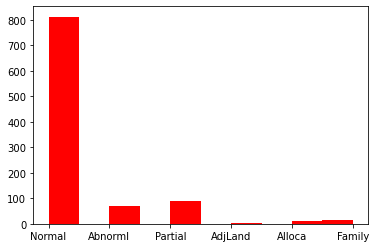

In [101]:
plt.hist(df['SaleCondition'],color='red')
plt.show()

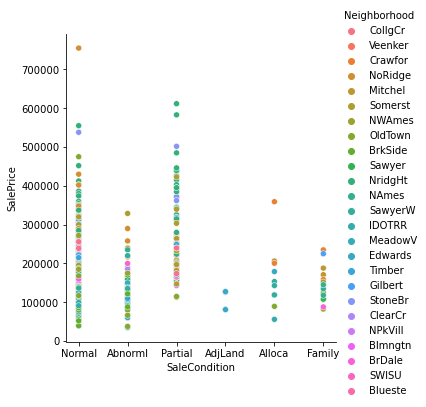

In [102]:
sns.relplot(data=df,x='SaleCondition',y='SalePrice',hue='Neighborhood')
plt.show()

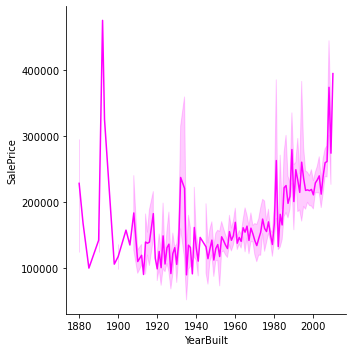

In [103]:
sns.relplot(data=df,x='YearBuilt',y='SalePrice',kind='line',color='magenta')
plt.show()

<Figure size 1440x1080 with 0 Axes>

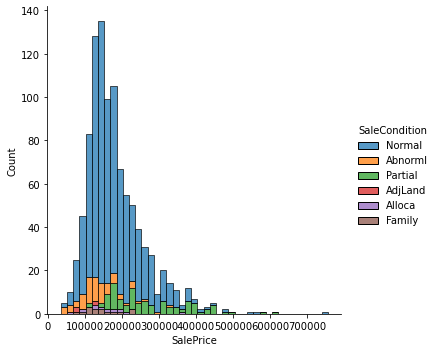

In [104]:
plt.figure(figsize=(20,15))
sns.displot(data=df,x='SalePrice',hue='SaleCondition',multiple='stack')
plt.show()

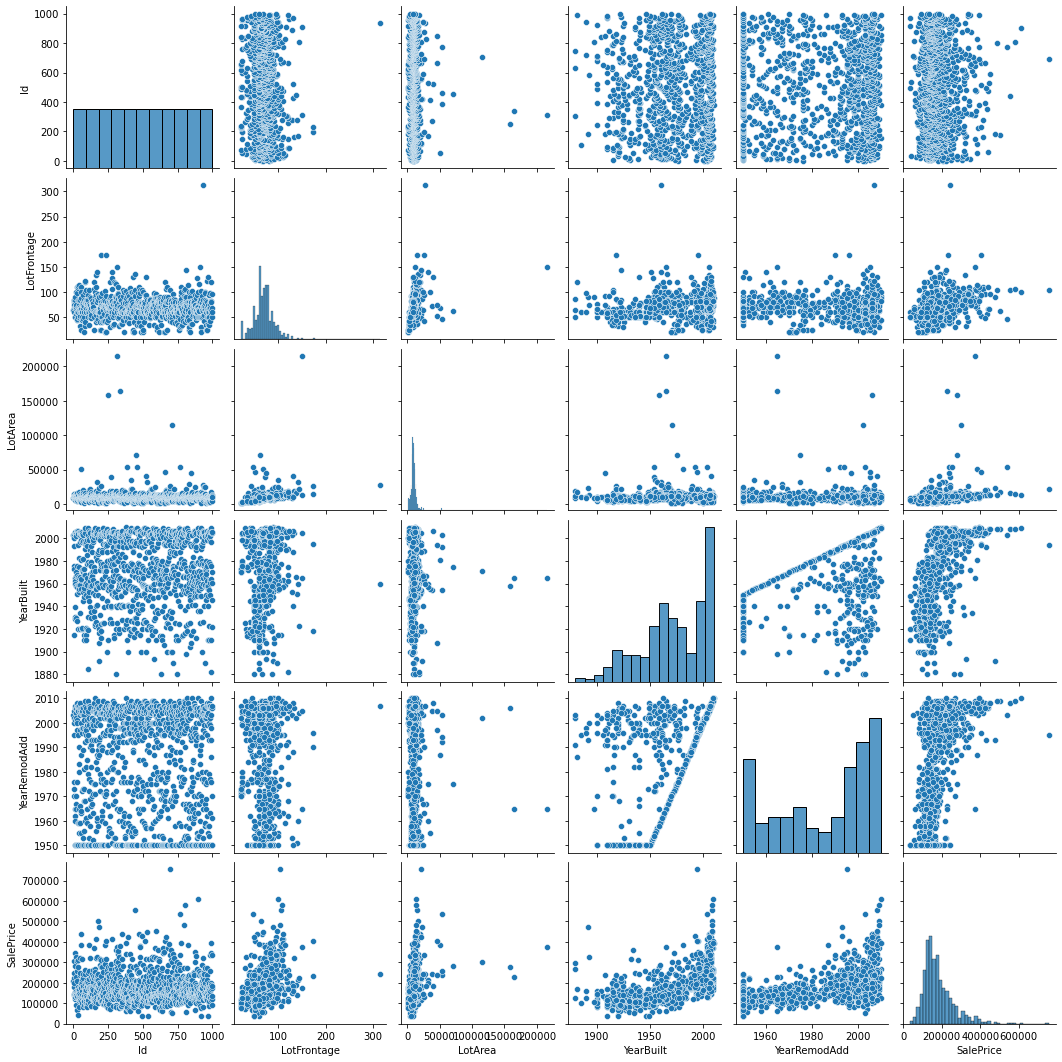

In [105]:
sns.pairplot(df)
plt.show()

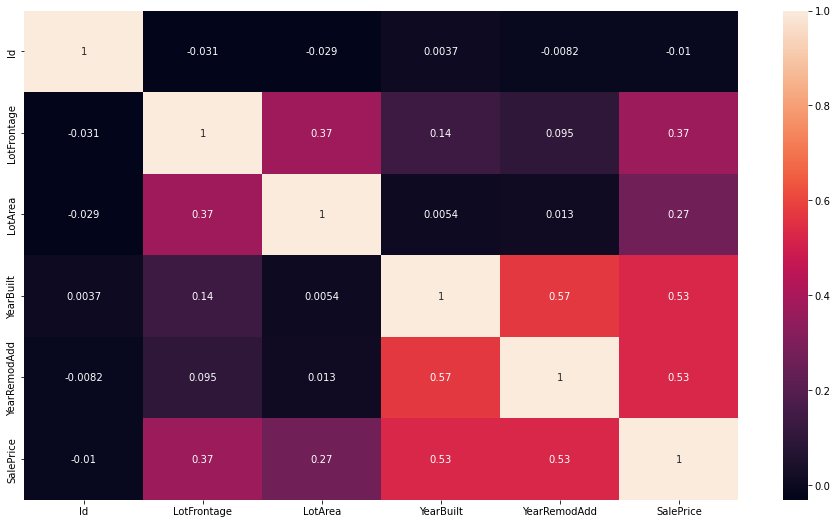

In [106]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Data Processing and Preperation

In [107]:
df['Street'].value_counts()

Pave    995
Grvl      4
Name: Street, dtype: int64

###### This can be happened Inbalance or Overfitting so,I am gonna delete it

In [108]:
df.drop(df.iloc[:,3:4],inplace=True,axis=1)

In [109]:
df.drop(df.iloc[:,0:1],inplace=True,axis=1)

In [110]:
df.head()

,LotFrontage,LotArea,Neighborhood,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SaleCondition,SalePrice
0,65.0,8450,CollgCr,2003,2003,Y,Y,Normal,208500
1,80.0,9600,Veenker,1976,1976,Y,Y,Normal,181500
2,68.0,11250,CollgCr,2001,2002,Y,Y,Normal,223500
3,60.0,9550,Crawfor,1915,1970,Y,Y,Abnorml,140000
4,84.0,14260,NoRidge,2000,2000,Y,Y,Normal,250000


In [111]:
df.duplicated().sum()

0

In [112]:
df.isnull().sum()

LotFrontage      173
LotArea            0
Neighborhood       0
YearBuilt          0
YearRemodAdd       0
CentralAir         0
PavedDrive         0
SaleCondition      0
SalePrice          0
dtype: int64

###### LotFrontage has 173 null values,so we have to fill it

In [113]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)

In [114]:
df.isnull().sum()

LotFrontage      0
LotArea          0
Neighborhood     0
YearBuilt        0
YearRemodAdd     0
CentralAir       0
PavedDrive       0
SaleCondition    0
SalePrice        0
dtype: int64

In [115]:
df.head()

,LotFrontage,LotArea,Neighborhood,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SaleCondition,SalePrice
0,65.0,8450,CollgCr,2003,2003,Y,Y,Normal,208500
1,80.0,9600,Veenker,1976,1976,Y,Y,Normal,181500
2,68.0,11250,CollgCr,2001,2002,Y,Y,Normal,223500
3,60.0,9550,Crawfor,1915,1970,Y,Y,Abnorml,140000
4,84.0,14260,NoRidge,2000,2000,Y,Y,Normal,250000


In [116]:
from sklearn.preprocessing import OneHotEncoder

In [117]:
df['SaleCondition'] = df['SaleCondition'].astype('category')
df['Neighborhood'] = df['Neighborhood'].astype('category')

In [118]:
df['NewSaleCondition'] = df['SaleCondition'].cat.codes
df['NewNeighborhood'] = df['Neighborhood'].cat.codes

In [119]:
enc = OneHotEncoder()
enc_data = enc.fit_transform(df[['NewNeighborhood','NewSaleCondition']])

In [120]:
enc_data = pd.DataFrame(enc_data.toarray())

In [121]:
new_df = df.join(enc_data)

In [122]:
one_hot_encoded_data = pd.get_dummies(df,columns=['NewSaleCondition','NewNeighborhood'])

In [123]:
df.head()

,LotFrontage,LotArea,Neighborhood,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SaleCondition,SalePrice,NewSaleCondition,NewNeighborhood
0,65.0,8450,CollgCr,2003,2003,Y,Y,Normal,208500,4,5
1,80.0,9600,Veenker,1976,1976,Y,Y,Normal,181500,4,24
2,68.0,11250,CollgCr,2001,2002,Y,Y,Normal,223500,4,5
3,60.0,9550,Crawfor,1915,1970,Y,Y,Abnorml,140000,0,6
4,84.0,14260,NoRidge,2000,2000,Y,Y,Normal,250000,4,15


In [124]:
df.drop(df.iloc[:,2:3],inplace=True,axis=1)

In [125]:
df.drop(df.iloc[:,6:7],inplace=True,axis=1)

In [126]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SalePrice,NewSaleCondition,NewNeighborhood
0,65.0,8450,2003,2003,Y,Y,208500,4,5
1,80.0,9600,1976,1976,Y,Y,181500,4,24
2,68.0,11250,2001,2002,Y,Y,223500,4,5
3,60.0,9550,1915,1970,Y,Y,140000,0,6
4,84.0,14260,2000,2000,Y,Y,250000,4,15


In [127]:
df['CentralAir'].replace({'Y':1,'N':0},inplace=True)

In [128]:
df['PavedDrive'].replace({'Y':2,'P':1,'N':0},inplace=True)

In [129]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SalePrice,NewSaleCondition,NewNeighborhood
0,65.0,8450,2003,2003,1,2,208500,4,5
1,80.0,9600,1976,1976,1,2,181500,4,24
2,68.0,11250,2001,2002,1,2,223500,4,5
3,60.0,9550,1915,1970,1,2,140000,0,6
4,84.0,14260,2000,2000,1,2,250000,4,15


In [130]:
from sklearn.preprocessing import RobustScaler

In [131]:
rs = RobustScaler()

In [132]:
df['LotFrontage'] = rs.fit_transform(df[['LotFrontage']])

In [133]:
df['LotArea'] = rs.fit_transform(df[['LotArea']])

In [134]:
df[['YearBuilt','YearRemodAdd']] = rs.fit_transform(df[['YearBuilt','YearRemodAdd']])

In [135]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SalePrice,NewSaleCondition,NewNeighborhood
0,-0.261183,-0.247836,0.630435,0.243243,1,2,208500,4,5
1,0.528291,0.036606,0.043478,-0.486486,1,2,181500,4,24
2,-0.103288,0.444719,0.586957,0.216216,1,2,223500,4,5
3,-0.524341,0.024239,-1.282609,-0.648649,1,2,140000,0,6
4,0.738817,1.189216,0.565217,0.162162,1,2,250000,4,15


# P2.Implementation of KNN, DT, and RF

##### Requirements for algorithms (parameters to change):
    o KNN – k value
    o DT – minSamplesLeaf; maxDepth.
    o RF – nEstimators;

# KNN – k value

In [136]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [137]:
X = df.drop(df.iloc[:,6:7],axis=1)
y = df.iloc[:,6:7]

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

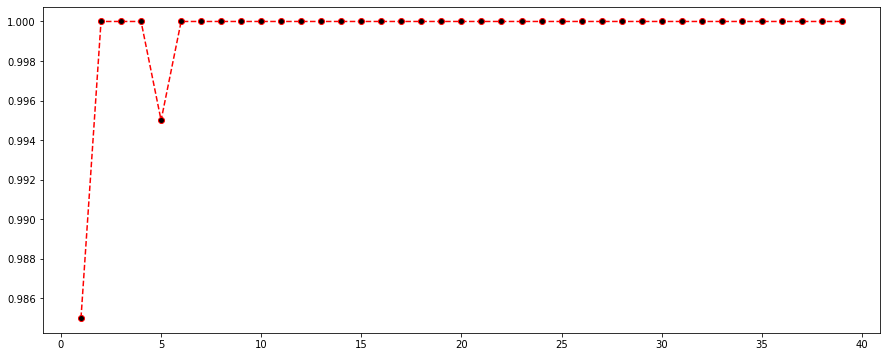

Minimum error rate is 0.985


In [139]:
import warnings
warnings.filterwarnings("ignore")
error_rate = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',
        marker='o',markerfacecolor='black')
plt.show()
print(f"Minimum error rate is {np.min(error_rate)}")

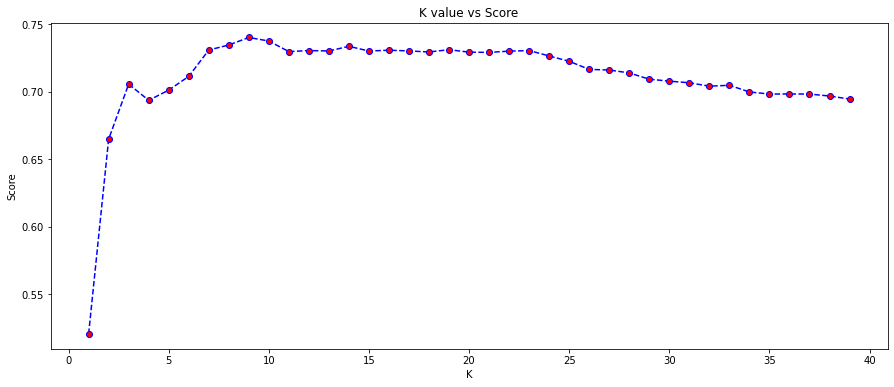

Maximum accuracy score is 0.7402034737418564 at K=8


In [77]:
from sklearn.metrics import r2_score
score = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(r2_score(y_test,y_pred))
plt.figure(figsize=(15,6))
plt.plot(range(1,40),score,color='blue',linestyle='dashed',
        marker='o',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Score')
plt.title("K value vs Score")
plt.show()
print(f"Maximum accuracy score is {max(score)} at K={score.index(max(score))}")

# DT – minSamplesLeaf; maxDepth.

In [144]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [146]:
dt_pred = dt.predict(X_test)

In [147]:
r2_score(y_test,dt_pred)

0.45319916260757986

###### The default minSamplesLeaf is 1,maxDepth is none and our score is too bad so,let's find out how we can improve the Score

# We are gonna use Grid Search,Randomized  to find best optional parameters for our(decision tree) model

In [149]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

In [150]:
dt_reg = DecisionTreeRegressor()
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=42)

In [333]:
dt_min_samples_leaf = [1,2,3,4,5]
dt_max_depth = [2,4,6,8,10,12]

In [334]:
parameters = dict(min_samples_leaf = dt_min_samples_leaf,
                  max_depth = dt_max_depth)

In [335]:
parameters

{'min_samples_leaf': [1, 2, 3, 4, 5], 'max_depth': [2, 4, 6, 8, 10, 12]}

In [336]:
search = RandomizedSearchCV(dt_reg,
                            parameters,
                            cv = cv)

In [337]:
search.fit(X,y)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
                   estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12],
                                        'min_samples_leaf': [1, 2, 3, 4, 5]})

In [339]:
print(f"The Best Score is {search.best_score_}")

The Best Score is 0.5723923546952262


In [340]:
print(f"The Best Parameters are {search.best_params_}")

The Best Parameters are {'min_samples_leaf': 3, 'max_depth': 6}


###### The best score is equal to the 57 percent when the min_samples leaf is 3 and max_depth is 6

# RF – nEstimators;

In [157]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SalePrice,NewSaleCondition,NewNeighborhood
0,-0.261183,-0.247836,0.630435,0.243243,1,2,208500,4,5
1,0.528291,0.036606,0.043478,-0.486486,1,2,181500,4,24
2,-0.103288,0.444719,0.586957,0.216216,1,2,223500,4,5
3,-0.524341,0.024239,-1.282609,-0.648649,1,2,140000,0,6
4,0.738817,1.189216,0.565217,0.162162,1,2,250000,4,15


In [158]:
from sklearn.ensemble import RandomForestRegressor

In [207]:
rf_reg = RandomForestRegressor()

In [170]:
parameters = dict()

In [171]:
parameters['n_estimators'] = [10,50,100,200,300]

In [172]:
parameters

{'n_estimators': [10, 50, 100, 200, 300]}

In [173]:
result = RandomizedSearchCV(rf_reg,
                           parameters,
                           cv=cv)

In [174]:
result.fit(X,y)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
                   estimator=RandomForestRegressor(),
                   param_distributions={'n_estimators': [10, 50, 100, 200,
                                                         300]})

In [178]:
print(f"The Best Score is {result.best_score_}")

The Best Score is 0.6611913940562995


In [211]:
print(f"The Best Parameter is {result.best_params_}")

The Best Parameter is {'n_estimators': 200}


In [130]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,SalePrice,NewSaleCondition,NewNeighborhood
0,-0.261183,-0.247836,0.630435,0.243243,1,2,208500,4,5
1,0.528291,0.036606,0.043478,-0.486486,1,2,181500,4,24
2,-0.103288,0.444719,0.586957,0.216216,1,2,223500,4,5
3,-0.524341,0.024239,-1.282609,-0.648649,1,2,140000,0,6
4,0.738817,1.189216,0.565217,0.162162,1,2,250000,4,15


In [195]:
y_test = y_test.reset_index(drop=True)
y_test

,SalePrice
0,210000
1,225000
2,145000
3,360000
4,132000
...,...
195,136500
196,68500
197,141000
198,276000


In [281]:
res = pd.DataFrame(y_pred).join(y_test)

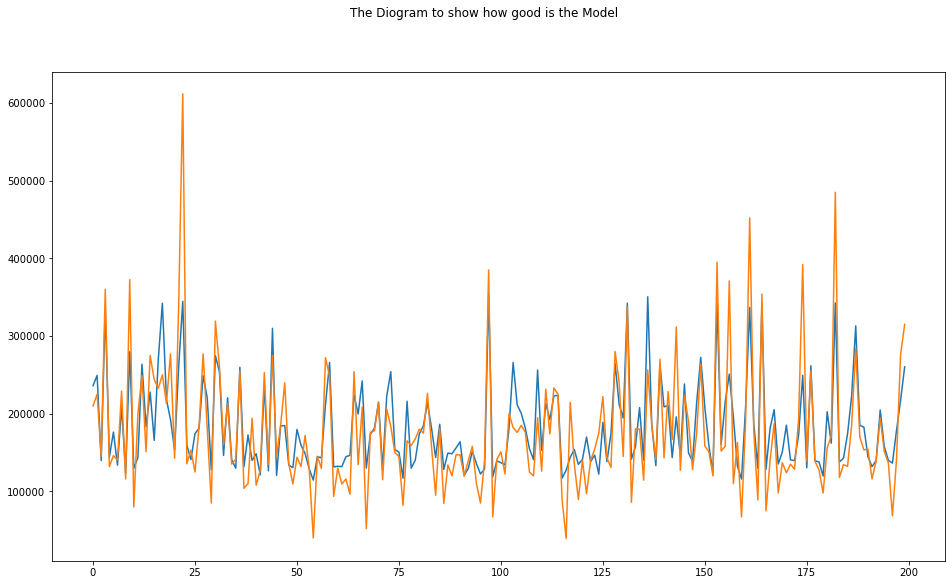

In [206]:
plt.figure(figsize=(16,9))
plt.plot(res)
plt.suptitle('The Diogram to show how good is the Model')
plt.show()

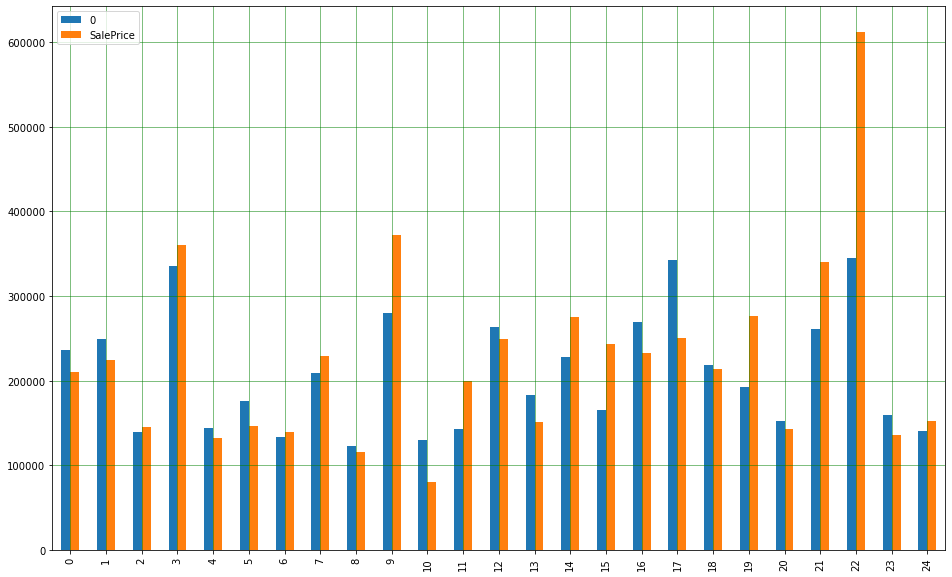

In [282]:
df1 = res.head(25)
df1.plot(kind = 'bar',figsize = (16,10))
plt.grid(linestyle='-',linewidth ='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

# P3 and P4.

# Creating DMM means to select optimal hyper-parameters and perform output analysis.

### Evaluate results using MAE, MAPE metrics.

In [218]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [219]:
knn_mae = mean_absolute_error(y_test,y_pred)
knn_mape = mean_absolute_percentage_error(y_test,y_pred) * 100

In [220]:
dt_mae = mean_absolute_error(y_test,dt_pred)
dt_mape = mean_absolute_percentage_error(y_test,dt_pred) * 100

In [221]:
rf_mae = mean_absolute_error(y_test,rf_pred)
rf_mape = mean_absolute_percentage_error(y_test,rf_pred) * 100

In [222]:
knn_met = [knn_mae,knn_mape]
dt_met = [dt_mae,dt_mape]
rf_met = [rf_mae,rf_mape]

In [223]:
all_met = list(zip(knn_met,dt_met,rf_met))

In [224]:
pd.DataFrame(all_met,columns=['KNN','Decision Tree Regressor','Random Forest Regressor'],
            index=['MAE','MAPE'])

,KNN,Decision Tree Regressor,Random Forest Regressor
MAE,31479.222692,41042.340000,29646.709793
MAPE,21.297508,23.806708,18.204000


#### If a model has the lowest MAE,MAPE,It is the most succesfull model,so The Best One is RFReg

# P5. Work conclusions

### Compare the results of DMMs that use Your implementation and “scikit-learn” library.

### Actually,As we can see,Using hyparemeter tunning to choose best optimal choose is so important.

##### We use 3 model in the project:Knn,DT,RF.K in Knn,min_samples_leaf and max_depth in the Decision Tree,n_estimators in the Random Forest.Result is not too bad.Decision tree is the worst one and Knn is the best one.In Concluison,at the end of our project,we saw the some performance metrics like Mean Absolute Error and Mean Absolute Persentage Error.Mae is the diference between Predicted Values and Actual Values,So Lowest MAE and MAPE is the best one,We cann see it in the last DataFrame.Random Forest is the best one